### Sentiment Analysis of Movie Reviews
### Team:
Juan Kehoe(mentor), Jakub Dlugosz(mentee), Justin Buckner(mentee)  </n>

 

## Problem Statement </n>
Movies are a common form of entertainment for people, but the process of choosing a movie can be time consuming due to the vast amount of movies available. And choosing the wrong movie (aka one that you regret wasting time to watch) is a costly decision that adds up over time. </n>
</n>
Our goal is to help people reduce the amount of time spent choosing a movie and increase their likelihood of choosing a movie they enjoy.
Why this problem?</n>
1. To help people waste less time and enjoy better movies</n>
2. To help us learn and understand sentiment analysis.</n>

# Did your planned solution change along the course of this project? </n>
Yes, we intended on comparing reviews from official moview review sites (i.e. Rotten Tomatoes, IMD, etc) with reviews from social media (i.e. Twitter). After collecting the tweets and seeing the data, we estimated the effort of manually processing the data to be too time consuming considering the project deadline.

# What kinds of problems did you run into along the way?
- Data preprocessing was the most time consuming part since the data was not cleaned and formatted properly, having mix of strings and numeric datatypes in a single column

# What are the tradeoffs in your solution/approach?
- We seperated the data into two extremes where any review that had a score of 5 was positive and any score of 1 was a negative sentiment, because of that we end up losing some data because we are not taking into acount reviews that fall between the 2-4 range.

# What technologies/methods did you implement in your solution? </n>
TECH: </n>
    Jupyter Notebook </n>
    Excel </n>
METHODS:</n>
Logistic Regression Model

## Approach </n>
What is your approach to tackling your problem?</n>
1. Decide on criteria for movies</n>
2. Pull movie review data from rotten tomatoes</n>
3. Prepare the data</n>
4. Apply a logistic regression model</n>

## Use Cases/Impact </n>
What impact would this solution have?</n>
Help a user save time:</n>
    reduce time choosing a movie to watch</n>
    reduce likelihood of watching a movie they wouldn't like</n>
</n>
Increase enjoyment:</n>
    help users watch more movies they enjoy</n>

## Movie Review Data Prep

In [1]:
# The data for movie reviews comes from kaggle that has two data sets of rotten tomatoe movie reviews 
#https://www.kaggle.com/datasets/stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import re


In [3]:
%pwd

'c:\\Python-Projects\\NLP\\Movie Review Project'

In [4]:
#read in the movies data set
movies = pd.read_csv(r'rotten_tomatoes_movies.csv')
movies

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17707,m/zoot_suit,Zoot Suit,Mexican-American gangster Henry Reyna (Daniel ...,NaN,R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid...",1981-10-02,...,MCA Universal Home Video,Rotten,56.0,9.0,Upright,74.0,1195.0,2,5,4
17708,m/zootopia,Zootopia,From the largest elephant to the smallest shre...,The brilliantly well-rounded Zootopia offers a...,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","J.K. Simmons, Kristen Bell, Octavia Spencer, A...",2016-03-04,...,Walt Disney Animation Studios,Certified-Fresh,98.0,291.0,Upright,92.0,101511.0,50,285,7
17709,m/zorba_the_greek,Zorba the Greek,Traveling to inspect an abandoned mine his fat...,NaN,NR,"Action & Adventure, Art House & International,...",NaN,NaN,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",1964-12-17,...,Fox,Fresh,80.0,10.0,Upright,86.0,7146.0,0,8,2
17710,m/zulu,Zulu,"In 1879, the Zulu nation hands colonial Britis...",Zulu patiently establishes a cast of colorful ...,PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",1964-06-17,...,Paramount Pictures,Fresh,96.0,23.0,Upright,91.0,30193.0,6,22,1


In [5]:
#read in the reviews data set
reviews = pd.read_csv(r'rotten_tomatoes_critic_reviews.csv')
reviews

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...
...,...,...,...,...,...,...,...,...
1130012,m/zulu_dawn,Chuck O'Leary,False,Fantastica Daily,Rotten,2/5,2005-11-02,NaN
1130013,m/zulu_dawn,Ken Hanke,False,"Mountain Xpress (Asheville, NC)",Fresh,3.5/5,2007-03-07,"Seen today, it's not only a startling indictme..."
1130014,m/zulu_dawn,Dennis Schwartz,False,Dennis Schwartz Movie Reviews,Fresh,B+,2010-09-16,A rousing visual spectacle that's a prequel of...
1130015,m/zulu_dawn,Christopher Lloyd,False,Sarasota Herald-Tribune,Rotten,3.5/5,2011-02-28,"A simple two-act story: Prelude to war, and th..."


In [6]:
# new data frame with split value columns 
# we will label the reviews based on review scores 
new = reviews["review_score"].str.split(r'(/)', expand=True) # split when there is a / in the score column
reviews["review_score"] = new[0]
reviews["threshold"] = new[2]
reviews


,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content,threshold
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...,NaN
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff...",NaN
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...,NaN
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5,2010-02-09,Whether audiences will get behind The Lightnin...,5
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...,NaN
...,...,...,...,...,...,...,...,...,...
1130012,m/zulu_dawn,Chuck O'Leary,False,Fantastica Daily,Rotten,2,2005-11-02,NaN,5
1130013,m/zulu_dawn,Ken Hanke,False,"Mountain Xpress (Asheville, NC)",Fresh,3.5,2007-03-07,"Seen today, it's not only a startling indictme...",5
1130014,m/zulu_dawn,Dennis Schwartz,False,Dennis Schwartz Movie Reviews,Fresh,B+,2010-09-16,A rousing visual spectacle that's a prequel of...,None
1130015,m/zulu_dawn,Christopher Lloyd,False,Sarasota Herald-Tribune,Rotten,3.5,2011-02-28,"A simple two-act story: Prelude to war, and th...",5


In [7]:
# need to distinguish between an actual score rating and a letter rating 
reviews.loc[reviews['review_score'] == 'A+', 'threshold'] = 'Letter'
reviews.loc[reviews['review_score'] == 'A', 'threshold'] = 'Letter'
reviews.loc[reviews['review_score'] == 'A-', 'threshold'] = 'Letter'
reviews.loc[reviews['review_score'] == 'A -', 'threshold'] = 'Letter'
reviews.loc[reviews['review_score'] == 'B+', 'threshold'] = 'Letter'
reviews.loc[reviews['review_score'] == 'B', 'threshold'] = 'Letter'
reviews.loc[reviews['review_score'] == 'B-', 'threshold'] = 'Letter'
reviews.loc[reviews['review_score'] == 'C+', 'threshold'] = 'Letter'
reviews.loc[reviews['review_score'] == 'C', 'threshold'] = 'Letter'
reviews.loc[reviews['review_score'] == 'C-', 'threshold'] = 'Letter'
reviews.loc[reviews['review_score'] == 'D+', 'threshold'] = 'Letter'
reviews.loc[reviews['review_score'] == 'D', 'threshold'] = 'Letter'
reviews.loc[reviews['review_score'] == 'D-', 'threshold'] = 'Letter'
reviews.loc[reviews['review_score'] == 'F+', 'threshold'] = 'Letter'
reviews.loc[reviews['review_score'] == 'F', 'threshold'] = 'Letter'
reviews.loc[reviews['review_score'] == 'F-', 'threshold'] = 'Letter'

In [8]:
reviews

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content,threshold
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...,NaN
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff...",NaN
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...,NaN
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5,2010-02-09,Whether audiences will get behind The Lightnin...,5
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...,NaN
...,...,...,...,...,...,...,...,...,...
1130012,m/zulu_dawn,Chuck O'Leary,False,Fantastica Daily,Rotten,2,2005-11-02,NaN,5
1130013,m/zulu_dawn,Ken Hanke,False,"Mountain Xpress (Asheville, NC)",Fresh,3.5,2007-03-07,"Seen today, it's not only a startling indictme...",5
1130014,m/zulu_dawn,Dennis Schwartz,False,Dennis Schwartz Movie Reviews,Fresh,B+,2010-09-16,A rousing visual spectacle that's a prequel of...,Letter
1130015,m/zulu_dawn,Christopher Lloyd,False,Sarasota Herald-Tribune,Rotten,3.5,2011-02-28,"A simple two-act story: Prelude to war, and th...",5


In [9]:
# now we quantify what each grade is worth in scores
reviews.loc[reviews['review_score'] == 'A+', 'review_score'] = 5
reviews.loc[reviews['review_score'] == 'A', 'review_score'] = 5
reviews.loc[reviews['review_score'] == 'A-', 'review_score'] = 5
reviews.loc[reviews['review_score'] == 'A -', 'review_score'] = 5
reviews.loc[reviews['review_score'] == 'B+', 'review_score'] = 4
reviews.loc[reviews['review_score'] == 'B', 'review_score'] = 4
reviews.loc[reviews['review_score'] == 'B-', 'review_score'] = 4
reviews.loc[reviews['review_score'] == 'C+', 'review_score'] = 3
reviews.loc[reviews['review_score'] == 'C', 'review_score'] = 3
reviews.loc[reviews['review_score'] == 'C-', 'review_score'] = 3
reviews.loc[reviews['review_score'] == 'D+', 'review_score'] = 2
reviews.loc[reviews['review_score'] == 'D', 'review_score'] = 2
reviews.loc[reviews['review_score'] == 'D-', 'review_score'] = 2
reviews.loc[reviews['review_score'] == 'F+', 'review_score'] = 1
reviews.loc[reviews['review_score'] == 'F', 'review_score'] = 1
reviews.loc[reviews['review_score'] == 'F-', 'review_score'] = 1


In [10]:
reviews

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content,threshold
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...,NaN
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff...",NaN
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...,NaN
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5,2010-02-09,Whether audiences will get behind The Lightnin...,5
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...,NaN
...,...,...,...,...,...,...,...,...,...
1130012,m/zulu_dawn,Chuck O'Leary,False,Fantastica Daily,Rotten,2,2005-11-02,NaN,5
1130013,m/zulu_dawn,Ken Hanke,False,"Mountain Xpress (Asheville, NC)",Fresh,3.5,2007-03-07,"Seen today, it's not only a startling indictme...",5
1130014,m/zulu_dawn,Dennis Schwartz,False,Dennis Schwartz Movie Reviews,Fresh,4,2010-09-16,A rousing visual spectacle that's a prequel of...,Letter
1130015,m/zulu_dawn,Christopher Lloyd,False,Sarasota Herald-Tribune,Rotten,3.5,2011-02-28,"A simple two-act story: Prelude to war, and th...",5


In [11]:
reviews = reviews[(reviews['threshold'] == '5') | (reviews['threshold'] == 'Letter')] # only filter on rows that have a letter or a score maximum of 5 to make things simpler

In [12]:
reviews

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content,threshold
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5,2010-02-09,Whether audiences will get behind The Lightnin...,5
7,m/0814255,Bill Goodykoontz,True,Arizona Republic,Fresh,3.5,2010-02-10,"Percy Jackson isn't a great movie, but it's a ...",5
8,m/0814255,Jordan Hoffman,False,UGO,Fresh,4,2010-02-10,"Fun, brisk and imaginative",Letter
9,m/0814255,Jim Schembri,True,The Age (Australia),Fresh,3,2010-02-10,"Crammed with dragons, set-destroying fights an...",5
10,m/0814255,Mark Adams,False,Daily Mirror (UK),Fresh,4,2010-02-10,"This action-packed fantasy adventure, based on...",5
...,...,...,...,...,...,...,...,...,...
1130012,m/zulu_dawn,Chuck O'Leary,False,Fantastica Daily,Rotten,2,2005-11-02,NaN,5
1130013,m/zulu_dawn,Ken Hanke,False,"Mountain Xpress (Asheville, NC)",Fresh,3.5,2007-03-07,"Seen today, it's not only a startling indictme...",5
1130014,m/zulu_dawn,Dennis Schwartz,False,Dennis Schwartz Movie Reviews,Fresh,4,2010-09-16,A rousing visual spectacle that's a prequel of...,Letter
1130015,m/zulu_dawn,Christopher Lloyd,False,Sarasota Herald-Tribune,Rotten,3.5,2011-02-28,"A simple two-act story: Prelude to war, and th...",5


In [13]:
reviews = reviews.dropna()
reviews

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content,threshold
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5,2010-02-09,Whether audiences will get behind The Lightnin...,5
7,m/0814255,Bill Goodykoontz,True,Arizona Republic,Fresh,3.5,2010-02-10,"Percy Jackson isn't a great movie, but it's a ...",5
8,m/0814255,Jordan Hoffman,False,UGO,Fresh,4,2010-02-10,"Fun, brisk and imaginative",Letter
9,m/0814255,Jim Schembri,True,The Age (Australia),Fresh,3,2010-02-10,"Crammed with dragons, set-destroying fights an...",5
10,m/0814255,Mark Adams,False,Daily Mirror (UK),Fresh,4,2010-02-10,"This action-packed fantasy adventure, based on...",5
...,...,...,...,...,...,...,...,...,...
1130004,m/zulu,Tony Sloman,False,Radio Times,Fresh,5,2017-07-10,The movie is a revelation.,5
1130013,m/zulu_dawn,Ken Hanke,False,"Mountain Xpress (Asheville, NC)",Fresh,3.5,2007-03-07,"Seen today, it's not only a startling indictme...",5
1130014,m/zulu_dawn,Dennis Schwartz,False,Dennis Schwartz Movie Reviews,Fresh,4,2010-09-16,A rousing visual spectacle that's a prequel of...,Letter
1130015,m/zulu_dawn,Christopher Lloyd,False,Sarasota Herald-Tribune,Rotten,3.5,2011-02-28,"A simple two-act story: Prelude to war, and th...",5


In [14]:
full_df = pd.merge(reviews,movies,on ='rotten_tomatoes_link') # join in order to assiociate reviews to specific movies 
full_df

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content,threshold,movie_title,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5,2010-02-09,Whether audiences will get behind The Lightnin...,5,Percy Jackson & the Olympians: The Lightning T...,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0814255,Bill Goodykoontz,True,Arizona Republic,Fresh,3.5,2010-02-10,"Percy Jackson isn't a great movie, but it's a ...",5,Percy Jackson & the Olympians: The Lightning T...,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
2,m/0814255,Jordan Hoffman,False,UGO,Fresh,4,2010-02-10,"Fun, brisk and imaginative",Letter,Percy Jackson & the Olympians: The Lightning T...,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
3,m/0814255,Jim Schembri,True,The Age (Australia),Fresh,3,2010-02-10,"Crammed with dragons, set-destroying fights an...",5,Percy Jackson & the Olympians: The Lightning T...,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
4,m/0814255,Mark Adams,False,Daily Mirror (UK),Fresh,4,2010-02-10,"This action-packed fantasy adventure, based on...",5,Percy Jackson & the Olympians: The Lightning T...,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431552,m/zulu,Tony Sloman,False,Radio Times,Fresh,5,2017-07-10,The movie is a revelation.,5,Zulu,...,Paramount Pictures,Fresh,96.0,23.0,Upright,91.0,30193.0,6,22,1
431553,m/zulu_dawn,Ken Hanke,False,"Mountain Xpress (Asheville, NC)",Fresh,3.5,2007-03-07,"Seen today, it's not only a startling indictme...",5,Zulu Dawn,...,Tango Entertainment,Rotten,50.0,8.0,Upright,62.0,4469.0,0,4,4
431554,m/zulu_dawn,Dennis Schwartz,False,Dennis Schwartz Movie Reviews,Fresh,4,2010-09-16,A rousing visual spectacle that's a prequel of...,Letter,Zulu Dawn,...,Tango Entertainment,Rotten,50.0,8.0,Upright,62.0,4469.0,0,4,4
431555,m/zulu_dawn,Christopher Lloyd,False,Sarasota Herald-Tribune,Rotten,3.5,2011-02-28,"A simple two-act story: Prelude to war, and th...",5,Zulu Dawn,...,Tango Entertainment,Rotten,50.0,8.0,Upright,62.0,4469.0,0,4,4


In [15]:
full_df['review_score'] = pd.to_numeric(full_df['review_score']) #convert score column to numeric

In [16]:
full_df = full_df[(full_df['review_score'] == 5) | (full_df['review_score'] == 1)] # to avoid neutral reviews we will just filter on the minimum and maximum score

In [17]:
full_df

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content,threshold,movie_title,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
23,m/0814255,Kurt Loder,False,MTV,Rotten,1.0,2010-02-12,Sadly worthy of its dumping into the cinematic...,5,Percy Jackson & the Olympians: The Lightning T...,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
44,m/0814255,Christopher Tookey,False,Daily Mail (UK),Rotten,1.0,2010-02-16,"Maybe if you're aged between eight and 12, or ...",5,Percy Jackson & the Olympians: The Lightning T...,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
50,m/0814255,Tim Robey,True,Daily Telegraph (UK),Rotten,1.0,2010-02-16,A slab of market research in search of an actu...,5,Percy Jackson & the Olympians: The Lightning T...,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
58,m/0814255,Anthony Quinn,True,Independent (UK),Rotten,1.0,2010-02-16,If they'd played it for laughs it might just h...,5,Percy Jackson & the Olympians: The Lightning T...,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
61,m/0814255,Derek Malcolm,True,London Evening Standard,Rotten,1.0,2010-02-16,This ineffably wooden Chris Columbus adaptatio...,5,Percy Jackson & the Olympians: The Lightning T...,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431542,m/zootopia,Leslie Combemale,False,Cinema Siren,Fresh,5.0,2019-10-22,"There's so much to see, and so many little tou...",Letter,Zootopia,...,Walt Disney Animation Studios,Certified-Fresh,98.0,291.0,Upright,92.0,101511.0,50,285,7
431543,m/zootopia,Brent McKnight,False,The Last Thing I See,Fresh,5.0,2020-07-03,Zootopia is a spectacular achievement on every...,Letter,Zootopia,...,Walt Disney Animation Studios,Certified-Fresh,98.0,291.0,Upright,92.0,101511.0,50,285,7
431545,m/zootopia,Danielle Solzman,False,Solzy at the Movies,Fresh,5.0,2020-09-24,Zootopia is the rare animated Disney film that...,5,Zootopia,...,Walt Disney Animation Studios,Certified-Fresh,98.0,291.0,Upright,92.0,101511.0,50,285,7
431548,m/zulu,Dennis Schwartz,False,Dennis Schwartz Movie Reviews,Fresh,5.0,2000-01-01,"Caine was just splendid, it is still one of hi...",Letter,Zulu,...,Paramount Pictures,Fresh,96.0,23.0,Upright,91.0,30193.0,6,22,1


In [18]:
full_df['sentiment'] = full_df['review_score'].apply(lambda x: 'Positive' if x ==5 else 'Negative') # now we label each review based on the score they recieved and have a binary response

c:\Users\jdlugosz\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
full_df

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content,threshold,movie_title,...,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,sentiment
23,m/0814255,Kurt Loder,False,MTV,Rotten,1.0,2010-02-12,Sadly worthy of its dumping into the cinematic...,5,Percy Jackson & the Olympians: The Lightning T...,...,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76,Negative
44,m/0814255,Christopher Tookey,False,Daily Mail (UK),Rotten,1.0,2010-02-16,"Maybe if you're aged between eight and 12, or ...",5,Percy Jackson & the Olympians: The Lightning T...,...,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76,Negative
50,m/0814255,Tim Robey,True,Daily Telegraph (UK),Rotten,1.0,2010-02-16,A slab of market research in search of an actu...,5,Percy Jackson & the Olympians: The Lightning T...,...,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76,Negative
58,m/0814255,Anthony Quinn,True,Independent (UK),Rotten,1.0,2010-02-16,If they'd played it for laughs it might just h...,5,Percy Jackson & the Olympians: The Lightning T...,...,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76,Negative
61,m/0814255,Derek Malcolm,True,London Evening Standard,Rotten,1.0,2010-02-16,This ineffably wooden Chris Columbus adaptatio...,5,Percy Jackson & the Olympians: The Lightning T...,...,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431542,m/zootopia,Leslie Combemale,False,Cinema Siren,Fresh,5.0,2019-10-22,"There's so much to see, and so many little tou...",Letter,Zootopia,...,Certified-Fresh,98.0,291.0,Upright,92.0,101511.0,50,285,7,Positive
431543,m/zootopia,Brent McKnight,False,The Last Thing I See,Fresh,5.0,2020-07-03,Zootopia is a spectacular achievement on every...,Letter,Zootopia,...,Certified-Fresh,98.0,291.0,Upright,92.0,101511.0,50,285,7,Positive
431545,m/zootopia,Danielle Solzman,False,Solzy at the Movies,Fresh,5.0,2020-09-24,Zootopia is the rare animated Disney film that...,5,Zootopia,...,Certified-Fresh,98.0,291.0,Upright,92.0,101511.0,50,285,7,Positive
431548,m/zulu,Dennis Schwartz,False,Dennis Schwartz Movie Reviews,Fresh,5.0,2000-01-01,"Caine was just splendid, it is still one of hi...",Letter,Zulu,...,Fresh,96.0,23.0,Upright,91.0,30193.0,6,22,1,Positive


In [20]:
full_df.to_csv('Rotten_Tomatoes_Dataset.csv') #right out the new data set to be used for further analysis

## Movie Review Data Analysis

In [21]:
# open the recently created rotten tomatoes dataset for analysis
df = pd.read_csv('Rotten_Tomatoes_Dataset.csv')
df.head()

,Unnamed: 0,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content,threshold,...,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,sentiment
0,23,m/0814255,Kurt Loder,False,MTV,Rotten,1.0,2010-02-12,Sadly worthy of its dumping into the cinematic...,5,...,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76,Negative
1,44,m/0814255,Christopher Tookey,False,Daily Mail (UK),Rotten,1.0,2010-02-16,"Maybe if you're aged between eight and 12, or ...",5,...,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76,Negative
2,50,m/0814255,Tim Robey,True,Daily Telegraph (UK),Rotten,1.0,2010-02-16,A slab of market research in search of an actu...,5,...,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76,Negative
3,58,m/0814255,Anthony Quinn,True,Independent (UK),Rotten,1.0,2010-02-16,If they'd played it for laughs it might just h...,5,...,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76,Negative
4,61,m/0814255,Derek Malcolm,True,London Evening Standard,Rotten,1.0,2010-02-16,This ineffably wooden Chris Columbus adaptatio...,5,...,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76,Negative


In [22]:
df.columns

Index(['Unnamed: 0', 'rotten_tomatoes_link', 'critic_name', 'top_critic',
       'publisher_name', 'review_type', 'review_score', 'review_date',
       'review_content', 'threshold', 'movie_title', 'movie_info',
       'critics_consensus', 'content_rating', 'genres', 'directors', 'authors',
       'actors', 'original_release_date', 'streaming_release_date', 'runtime',
       'production_company', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'audience_status', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count',
       'sentiment'],
      dtype='object')

In [23]:
df.describe() # Summary Statisitcs

,Unnamed: 0,review_score,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
count,59037.000000,59037.000000,58674.000000,58969.000000,58969.000000,58926.000000,5.891000e+04,59037.000000,59037.000000,59037.000000
mean,212619.218643,3.737063,110.886594,68.910156,157.596771,68.852238,5.334537e+05,33.383709,118.964886,38.575791
std,125983.044495,1.859246,22.145725,31.308442,113.896312,21.240769,3.607354e+06,17.996908,111.227056,43.367737
min,23.000000,1.000000,5.000000,0.000000,5.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000
25%,102126.000000,1.000000,95.000000,43.000000,64.000000,53.000000,7.652000e+03,17.000000,29.000000,7.000000
50%,214224.000000,5.000000,107.000000,85.000000,135.000000,76.000000,3.641800e+04,36.000000,81.000000,22.000000
75%,321294.000000,5.000000,122.000000,93.000000,226.000000,86.000000,1.415010e+05,48.000000,183.000000,55.000000
max,431552.000000,5.000000,266.000000,100.000000,574.000000,100.000000,3.579764e+07,69.000000,497.000000,303.000000


In [24]:
df = df[['movie_title','genres','review_content','sentiment']] # select only the columns we want to work with 

In [25]:
df.head()

,movie_title,genres,review_content,sentiment
0,Percy Jackson & the Olympians: The Lightning T...,"Action & Adventure, Comedy, Drama, Science Fic...",Sadly worthy of its dumping into the cinematic...,Negative
1,Percy Jackson & the Olympians: The Lightning T...,"Action & Adventure, Comedy, Drama, Science Fic...","Maybe if you're aged between eight and 12, or ...",Negative
2,Percy Jackson & the Olympians: The Lightning T...,"Action & Adventure, Comedy, Drama, Science Fic...",A slab of market research in search of an actu...,Negative
3,Percy Jackson & the Olympians: The Lightning T...,"Action & Adventure, Comedy, Drama, Science Fic...",If they'd played it for laughs it might just h...,Negative
4,Percy Jackson & the Olympians: The Lightning T...,"Action & Adventure, Comedy, Drama, Science Fic...",This ineffably wooden Chris Columbus adaptatio...,Negative


## Data Preperation

In [26]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [27]:
# clean the review column 
def clean_text(text):
    """ 
    Change words to lower case, remove any punctuation and stop words 
    """
    text = text.lower()
    text = re.sub('[!|.|,|?|!|-|+]','',text)
    text = re.sub('\d','',text)
    text = ' '.join([word for word in text.split() if word not in (stopwords.words('english'))])
    return text 

In [28]:
clean_text('Hello 123?')

'hello'

In [29]:
cleaned = lambda x: clean_text(x)

In [30]:
df['review_content'] = df['review_content'].apply(cleaned)

# Graphing Sentiment by Genre

40397
18640
8862
6116
5659
5585
3220
196
11975
3339
841
1695
4196
2018


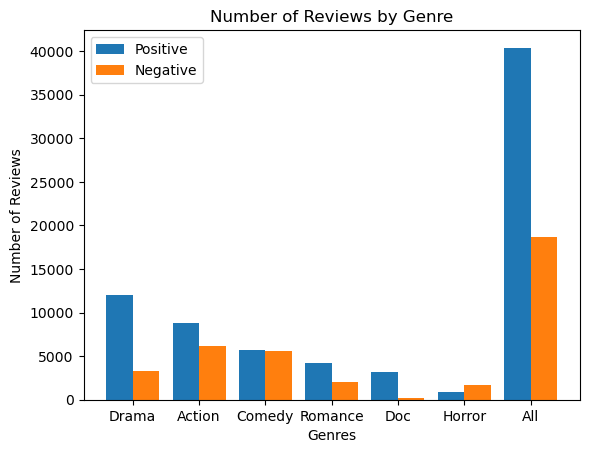

In [31]:

# 1. get list of movies by genre
# 2. loop thru genre list to compute the quantity of positive and the quantity of the negative sentiment
# 3. create list object containing quantity of positive and negative sentiment for each genre: i.e. obj = { action: { positive: 100, negative: 50 }, drama: { positive: 75, action: 30}, comedity: {...}}
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('Rotten_Tomatoes_Dataset.csv')
# df = df[['movie_title','genres','review_content','sentiment']]
actionFilter = df.genres == 'Action'
# actionMoviesCOUNT = df['genres'].str.contains('Action').sum()

# positiveActionMovies = df[(df.genres.str.contains('Action').any()) & (df.sentiment.eq)]
# print (positiveActionMovies)
# positive = (df.sentiment.eq('Positive')).sum()
# print (positive)

# NOTE: to filter genres, will be using startswith. This is for two reasons: 1) Assumption for this method is that the leading genre is the main/primary genre 2) avoid overlap in our data among genres
# Positive Action Movies. EXCEPT for 'Classic' movies, code looks for the word 'Classic' inside the genres column
genreList = ['Drama', 'Action', 'Comedy', 'Romance', 'Doc', 'Horror', 'All']
positiveAll = df[(df.sentiment.eq('Positive'))]
positiveAllCOUNT = len(positiveAll.index)
print(positiveAllCOUNT)
# Negative Action Movies
negativeAll = df[(df.sentiment.eq('Negative'))]
negativeAllCOUNT = len(negativeAll.index)
print(negativeAllCOUNT)

positiveAction = df[(df.genres.str.startswith('Action')) & (df.sentiment.eq('Positive'))]
positiveActionCOUNT = len(positiveAction.index)
print(positiveActionCOUNT)
# Negative Action Movies
negativeAction = df[(df.genres.str.startswith('Action')) & (df.sentiment.eq('Negative'))]
negativeActionCOUNT = len(negativeAction.index)
print(negativeActionCOUNT)

# Positive Comedy Movies
positiveComedy = df[(df.genres.str.startswith('Comedy')) & (df.sentiment.eq('Positive'))]
positiveComedyCOUNT = len(positiveComedy.index)
print(positiveComedyCOUNT)

# Negative Comedy Movies
negativeComedy = df[(df.genres.str.startswith('Comedy')) & (df.sentiment.eq('Negative'))]
negativeComedyCOUNT = len(negativeComedy.index)
print(negativeComedyCOUNT)


# Positive Documentary Movies
positiveDocumentary = df[(df.genres.str.startswith('Documentary')) & (df.sentiment.eq('Positive'))]
positiveDocumentaryCOUNT = len(positiveDocumentary.index)
print(positiveDocumentaryCOUNT)

# Negative Documentary Movies
negativeDocumentary = df[(df.genres.str.startswith('Documentary')) & (df.sentiment.eq('Negative'))]
negativeDocumentaryCOUNT = len(negativeDocumentary.index)
print(negativeDocumentaryCOUNT)

# Positive Drama Movies
positiveDrama = df[(df.genres.str.startswith('Drama')) & (df.sentiment.eq('Positive'))]
positiveDramaCOUNT = len(positiveDrama.index)
print(positiveDramaCOUNT)

# Negative Drama Movies
negativeDrama = df[(df.genres.str.startswith('Drama')) & (df.sentiment.eq('Negative'))]
negativeDramaCOUNT = len(negativeDrama.index)
print(negativeDramaCOUNT)

# Positive Horror Movies
positiveHorror = df[(df.genres.str.startswith('Horror')) & (df.sentiment.eq('Positive'))]
positiveHorrorCOUNT = len(positiveHorror.index)
print(positiveHorrorCOUNT)

# Negative Horror Movies
negativeHorror = df[(df.genres.str.startswith('Horror')) & (df.sentiment.eq('Negative'))]
negativeHorrorCOUNT = len(negativeHorror.index)
print(negativeHorrorCOUNT)


# Positive Romance Movies
positiveRomance = df[(df.genres.str.contains('Romance')) & (df.sentiment.eq('Positive'))]
positiveRomanceCOUNT = len(positiveRomance.index)
print(positiveRomanceCOUNT)

# Negative Romance Movies
negativeRomance = df[(df.genres.str.contains('Romance')) & (df.sentiment.eq('Negative'))]
negativeRomanceCOUNT = len(negativeRomance.index)
print(negativeRomanceCOUNT)

# # Positive Classic Movies
# positiveClassic = df[(df.genres.str.contains('Classic')) & (df.sentiment.eq('Positive'))]
# positiveClassicCOUNT = len(positiveClassic.index)
# print(positiveClassicCOUNT)

# # Negative Classic Movies
# negativeClassic = df[(df.genres.str.contains('Classic')) & (df.sentiment.eq('Negative'))]
# negativeClassicCOUNT = len(negativeClassic.index)
# print(negativeClassicCOUNT)

positiveCounts = [positiveDramaCOUNT, positiveActionCOUNT, positiveComedyCOUNT, positiveRomanceCOUNT, positiveDocumentaryCOUNT, positiveHorrorCOUNT, positiveAllCOUNT ]
negativeCounts = [negativeDramaCOUNT, negativeActionCOUNT, negativeComedyCOUNT,  negativeRomanceCOUNT, negativeDocumentaryCOUNT, negativeHorrorCOUNT, negativeAllCOUNT ]

X_axis = np.arange(len(genreList))
# print(X_axis)

plt.bar(X_axis - 0.2, positiveCounts, 0.4, label = 'Positive')
plt.bar(X_axis + 0.2, negativeCounts, 0.4, label = 'Negative')

plt.xticks(X_axis, genreList)
plt.xlabel("Genres")
plt.ylabel('Number of Reviews')
plt.title("Number of Reviews by Genre")
plt.legend()
plt.show()





## Get top most frequent words

In [32]:
import nltk
import numpy as np
import random
import string
import re
df = pd.read_csv('Rotten_Tomatoes_Dataset.csv')


# extract all positive reviews
# df.head()
positiveReviews = df[df.sentiment.eq('Positive')]
positiveReviewContent = positiveReviews['review_content']
# positiveReviews.head()
# positiveReviewContent.head()
# print (positiveReviewContent)
positiveWordFreq = {}
# positiveText = ' '.join(positiveReviewContent)
# sub = positiveReviewContent[0:20]
# subList
# for item in positiveReviewContent:
wordList = []
for item in positiveReviewContent:
    wordList.append(nltk.word_tokenize(item))
    
flatList = [item for sublist in wordList for item in sublist]
# print(flatList)
# positive_string = ' '.join(flatList)
# positive_word_fd = nltk.FreqDist(flatList)


# Normalize text with alpha words and lowercase
# for word in flatList:
#     if word.isaplha():

norm_word_list = [word.lower() for word in flatList if word.isalpha()]
# norm_word_list

# positive_string = ' '.join(norm_word_list)
positive_word_fd = nltk.FreqDist(norm_word_list)
# positive_word_fd

non_list = ['the', 'a', 'of', 'and', 'is', 'to', 'it', 'in', 'that', 'film', 'with', 'this', 'as', 'for', 'an', 'you', 'but', 'its', 'an', 'be', 'movie', 'from', 'at', 'has', 'by', 'on', 'about', 'i', 'are', 'there', 'we', 'have', 'what', 'into', 'can', 'there', 'or', 'if', 'he', 'year', 'just', 'who', 'will', 'something']

for key in positive_word_fd:
    if non_list.count(key):
        del positive_word_fd[key]


# sorted_words = positive_word_fd(sorted(dict.items()))
# positive_word_fd
# tokens = nltk.sent_tokenize(positiveText)
# tokens
# print (positiveText)
# corpus = nltk.sent_tokenize(positiveReviewContent)
# print (corpus)
# positiveWord_fd = nltk.FreqDist(positiveReviewContent)
# # print(positiveWord_fd)
# positiveWord_fd

In [33]:
import heapq
most_freq = heapq.nlargest(100, positive_word_fd, key=positive_word_fd.get)
most_freq

['one',
 'best',
 'most',
 'all',
 'his',
 'not',
 'more',
 'story',
 'so',
 'like',
 'films',
 'than',
 'great',
 'time',
 'ever',
 'love',
 'made',
 'life',
 'up',
 'out',
 'movies',
 'do',
 'even',
 'was',
 'how',
 'no',
 'us',
 'their',
 'work',
 'way',
 'drama',
 'director',
 'never',
 'classic',
 'comedy',
 'does',
 'funny',
 'your',
 'which',
 'performance',
 'much',
 'see',
 'every',
 'world',
 'also',
 'cinema',
 'good',
 'very',
 'only',
 'make',
 'they',
 'new',
 'makes',
 'first',
 'some',
 'both',
 'been',
 'may',
 'masterpiece',
 'when',
 'full',
 'characters',
 'while',
 'could',
 'her',
 'performances',
 'seen',
 'any',
 'still',
 'action',
 'our',
 'years',
 'documentary',
 'yet',
 'well',
 'de',
 'american',
 'through',
 'own',
 'man',
 'tale',
 'horror',
 'those',
 'heart',
 'real',
 'people',
 'beautiful',
 'many',
 'human',
 'two',
 'them',
 'thriller',
 'such',
 'get',
 'experience',
 'brilliant',
 'should',
 'fun',
 'emotional',
 'better']

## Model Building: Logistic Regression

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
#from sklearn.feature_extraction.text import TfidfVectorizer
#seperate from reviews and response

X = df['review_content']
y = df['sentiment']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [35]:
# train the logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
tvec = TfidfVectorizer()
clf = LogisticRegression()

In [36]:
model = Pipeline([('vectorizer',tvec),('classifier',clf)])
model.fit(X_train,y_train)

c:\Users\jdlugosz\Miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression())])

In [37]:
pred = model.predict(X_test)
pred

array(['Negative', 'Positive', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype=object)

In [38]:
print(accuracy_score(y_test,pred))

0.8871951219512195


In [39]:
#perform crossvalidation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=10)

c:\Users\jdlugosz\Miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\Users\jdlugosz\Miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logi

In [40]:
print(np.mean(scores)) # After performing a 10 k-fold cross validation we get an overall average score of 87% making it a consistent classifier

0.8748410045509909


Text(50.722222222222214, 0.5, 'True Values')

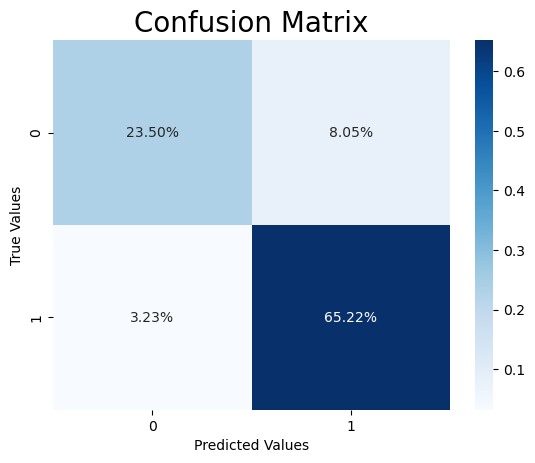

In [41]:
# heatmap of confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns


from sklearn.pipeline import Pipeline

cf_matrix = confusion_matrix(y_test,pred)

c_m_heatmap = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix', fontsize = 20)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')


## Application

In [44]:
#Try out a few random movie reviews to see how the model runs 
#Provide some sample use cases/scenarios to show how your solution could be used.
a = 'This is a very movie','This is a very funny movie'
model.predict(list(a))

array(['Negative', 'Positive'], dtype=object)